The CIFAR 10 dataset is loaded successfully
Training Data shape: (50000, 32, 32, 3)
Teating Data shape: (10000, 32, 32, 3)
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 115ms/step - accuracy: 0.4153 - loss: 1.5946 - val_accuracy: 0.5442 - val_loss: 1.2810
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 48ms/step - accuracy: 0.5687 - loss: 1.2137 - val_accuracy: 0.6186 - val_loss: 1.0878
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6316 - loss: 1.0485 - val_accuracy: 0.6371 - val_loss: 1.0390
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6690 - loss: 0.9447 - val_accuracy: 0.6792 - val_loss: 0.9006
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 50ms/step - accuracy: 0.6968 - loss: 0.8717 - val_accuracy: 0.6777 - val_loss: 0.9330
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 56ms/step - accuracy: 0.7191 - loss: 0.8113 - val_accuracy: 0.6853 - val_loss: 0.9168
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 167s 73ms/step - accuracy: 0.7343 - loss:

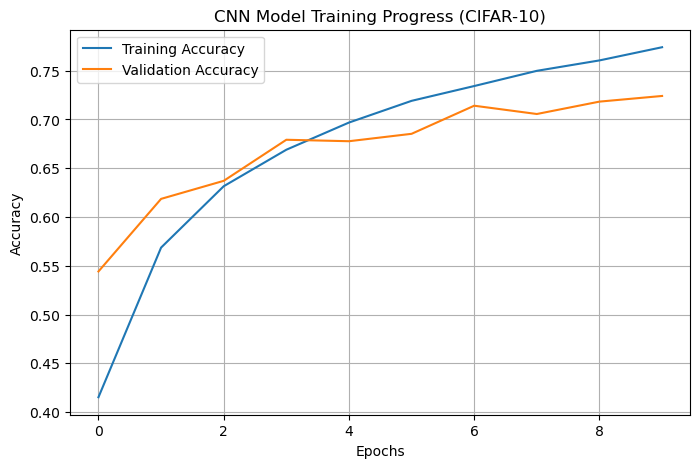

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


C:\Users\11\AppData\Local\Temp\ipykernel_5000\309796454.py:78: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[int(y_test[i])]}")


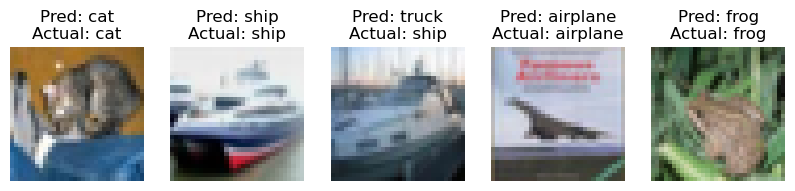

In [3]:
# Import libaries---
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

# Load images with CIFAR 10 datasets
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

# Normalize pixel value
X_train=X_train/255.0
X_test=X_test/255.0

print("The CIFAR 10 dataset is loaded successfully")
print("Training Data shape:", X_train.shape)
print("Teating Data shape:",X_test.shape)

# Step 2: Define CNN Model
model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 classes
])

# Step 3: Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=3,
    validation_data=(X_test, y_test)
)

# Step 5: Evaluate Model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")
print(f"📉 Test Loss: {loss:.4f}")

# Step 6: Plot Training Accuracy and Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Model Training Progress (CIFAR-10)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Visualize Some Predictions
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Take first 5 images from test set
predictions = model.predict(X_test[:5])

plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[int(y_test[i])]}")
    plt.axis('off')
plt.show()

The CIFAR 10 dataset is loaded successfully
Training Data shape: (50000, 32, 32, 3)
Teating Data shape: (10000, 32, 32, 3)
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.4451 - loss: 1.5453 - val_accuracy: 0.5413 - val_loss: 1.2871
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.5710 - loss: 1.2162 - val_accuracy: 0.5848 - val_loss: 1.1842
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.6113 - loss: 1.1035 - val_accuracy: 0.6260 - val_loss: 1.0732

✅ Test Accuracy: 62.60%
📉 Test Loss: 1.0732


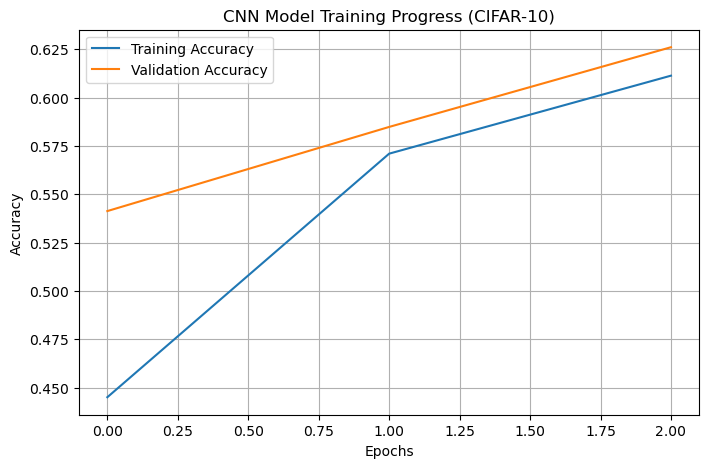

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


C:\Users\11\AppData\Local\Temp\ipykernel_5000\3792930735.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[int(y_test[i])]}")


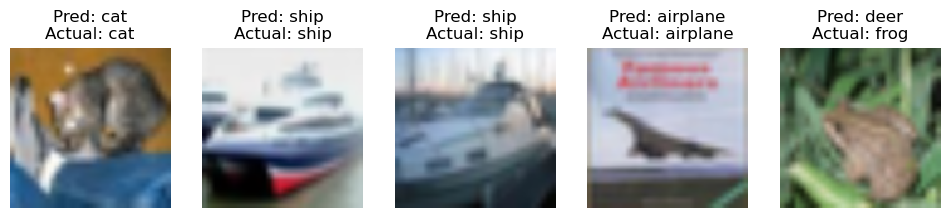

In [4]:
# Import libaries---
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.image import resize
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

# Load images with CIFAR 10 datasets
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

# Normalize pixel value
X_train=X_train/255.0
X_test=X_test/255.0

print("The CIFAR 10 dataset is loaded successfully")
print("Training Data shape:", X_train.shape)
print("Teating Data shape:",X_test.shape)

# Step 2: Define CNN Model
model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 classes
])

# Step 3: Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=3,
    validation_data=(X_test, y_test)
)

# Step 5: Evaluate Model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")
print(f"📉 Test Loss: {loss:.4f}")

# Step 6: Plot Training Accuracy and Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Model Training Progress (CIFAR-10)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Visualize Some Predictions
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Take first 5 images from test set
predictions = model.predict(X_test[:5])

plt.figure(figsize=(12,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    img_resized = resize(X_test[i], (128,128))
    plt.imshow(img_resized, interpolation='nearest')
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[int(y_test[i])]}")
    plt.axis('off')
plt.show()